In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from fedland.utils import load_all_training_results, get_experiment_description, plot_results_overview, plot_client_info

## Experiments 5 Clients, Cifar-10, FedNet

In [2]:
df = load_all_training_results(results_path="../results")
experiment_ids = [
    "be13a352-7c46-4fdc-9b1d-779275ab7785",
    "54a11b13-b2fe-47ef-a0d4-fa2b037f3647",
    "e45f0090-866d-4e7c-865c-3a0aa24285ae",
    "84efe4fc-6193-4c2b-b0f7-57b835e9702c",
    "9689d898-78ac-4536-9575-8076a8eb8215",
    "6000de56-3204-44fe-9836-02e3aac2feff",
    "81802054-586c-4295-9aaf-7211b81d3250",
    "68d69cd7-bb04-4174-842d-2957d5331058"
]
df = df[df["experiment_id"].isin(experiment_ids)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825 entries, 1305 to 15319
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        11825 non-null  int64         
 1   epoch                        11825 non-null  int64         
 2   learning_rate                11825 non-null  float64       
 3   batch_size                   11825 non-null  int64         
 4   len_train_indices            11825 non-null  int64         
 5   len_test_indices             11825 non-null  int64         
 6   momentum                     11825 non-null  float64       
 7   train_loss                   11825 non-null  float64       
 8   train_accuracy               11825 non-null  float64       
 9   test_loss                    11825 non-null  float64       
 10  test_accuracy                11825 non-null  float64       
 11  path_norm                    11825 non-null

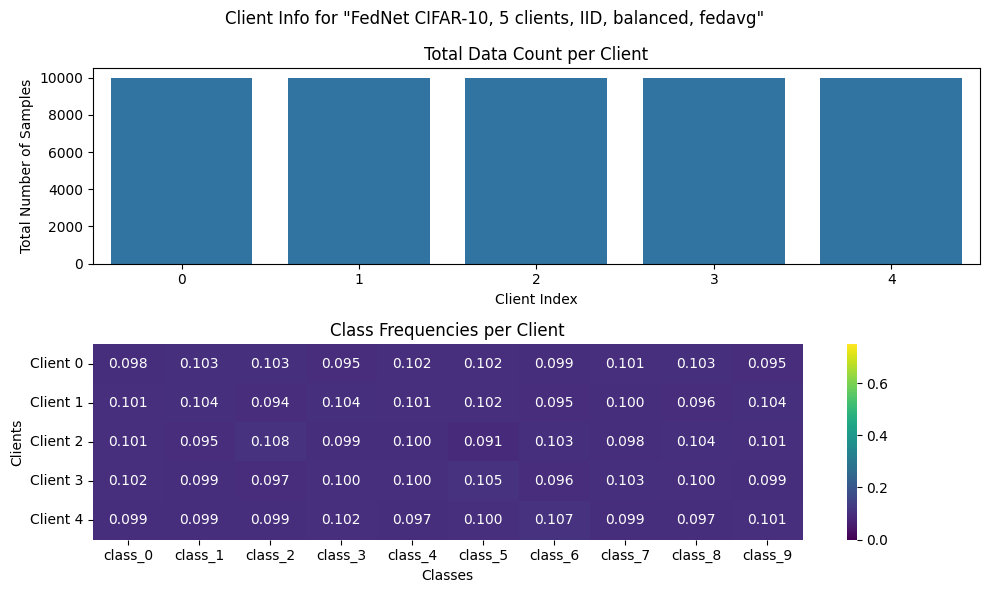

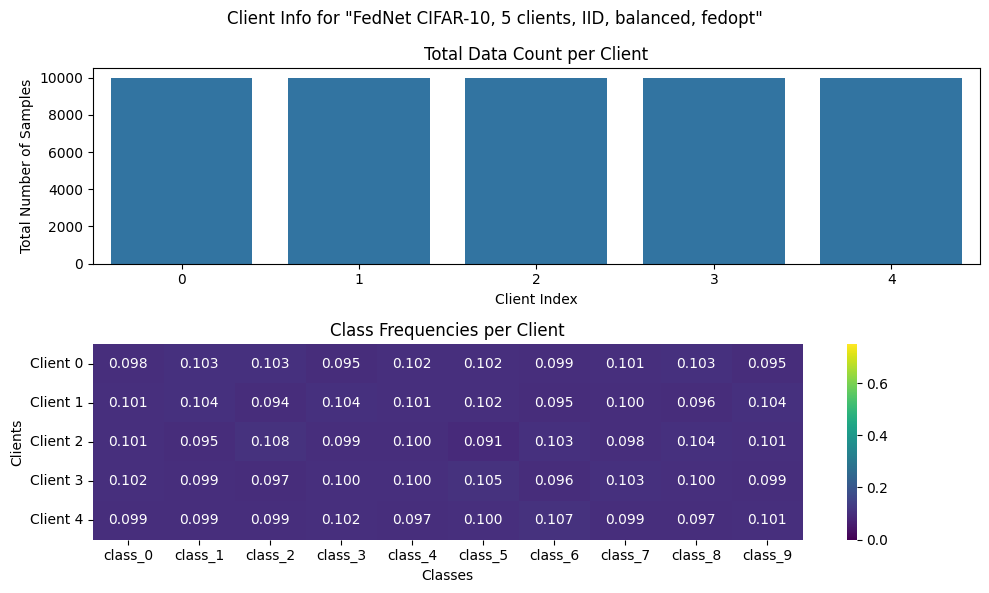

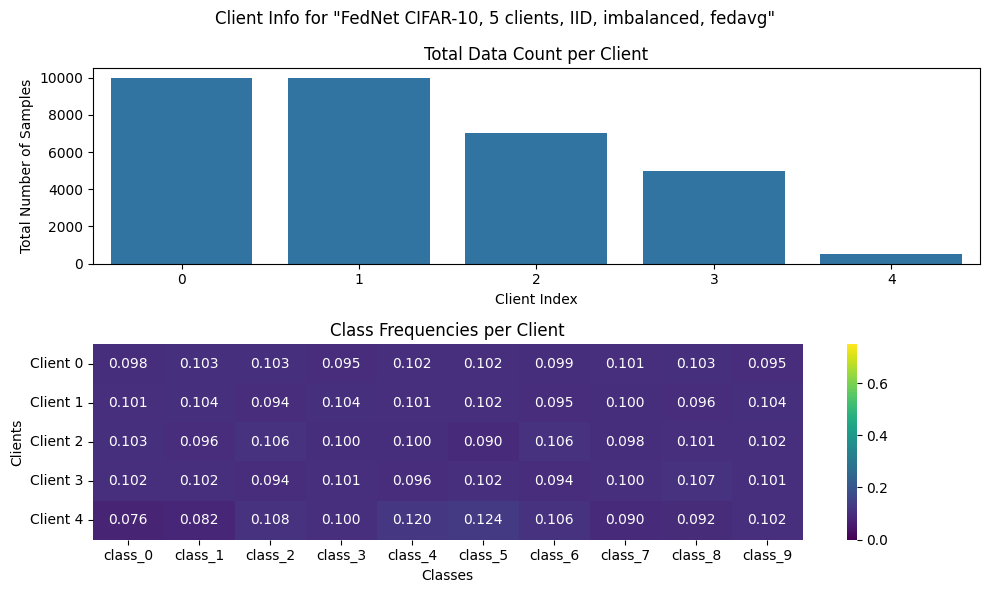

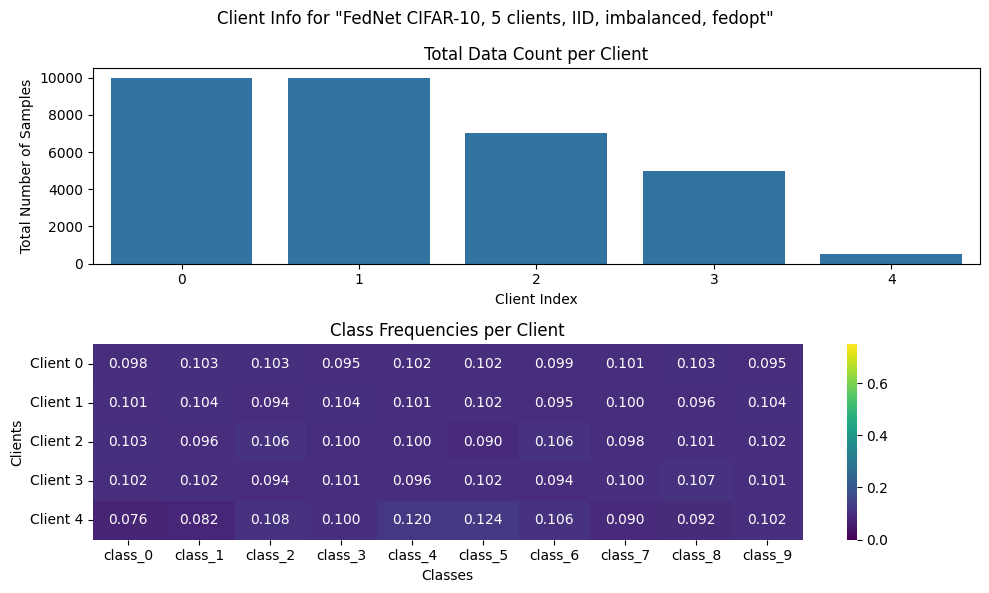

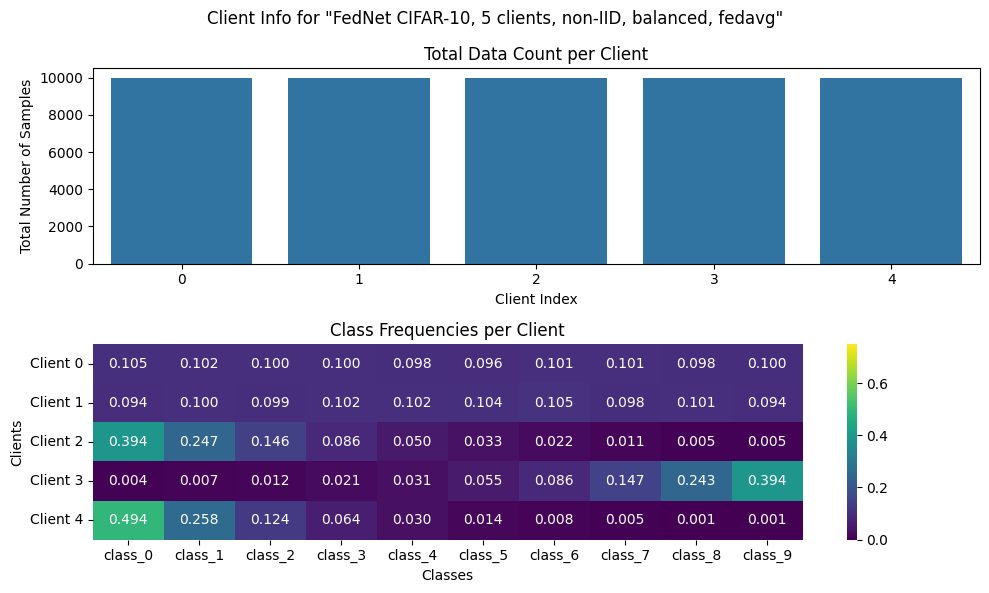

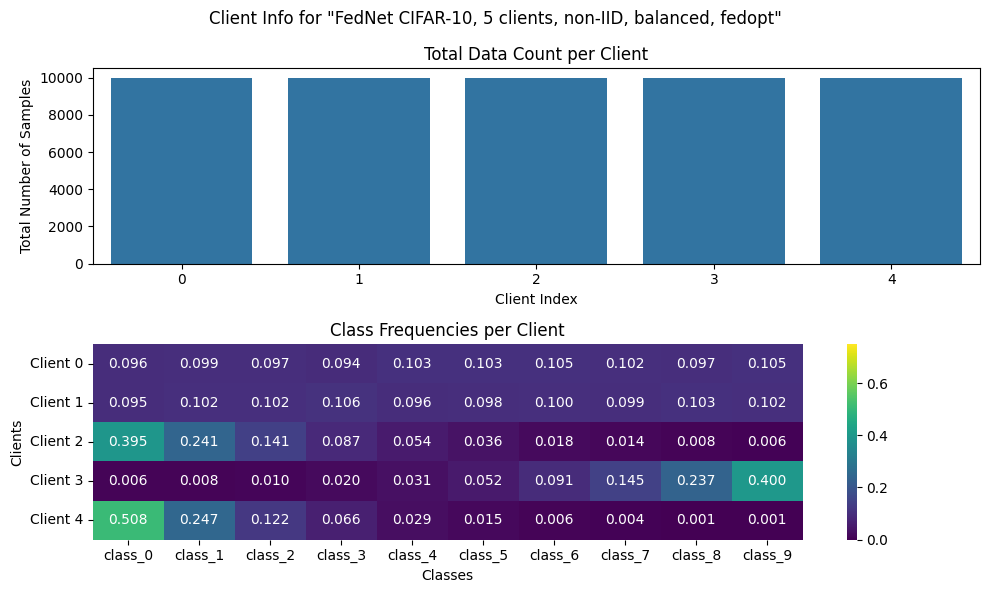

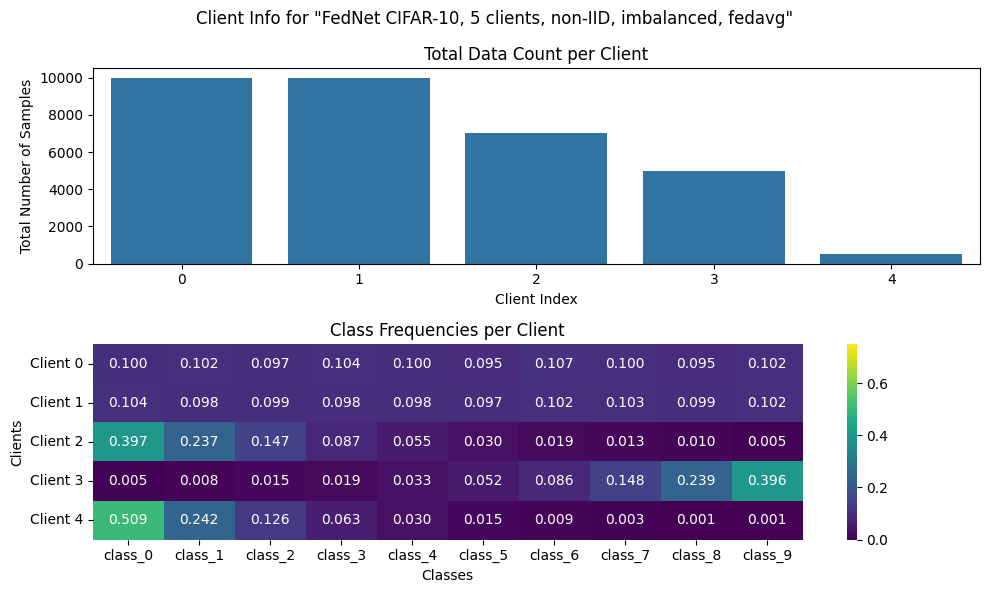

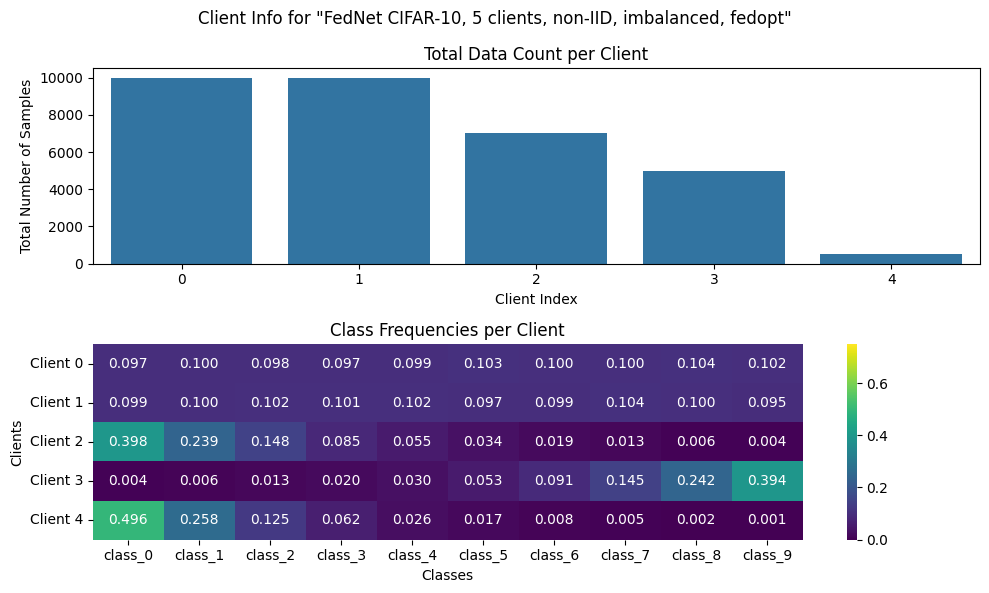

In [3]:
for eid in experiment_ids:
    plot_client_info(experiment_id=eid, results_path="../results", figsize=(10, 6))

['FedNet CIFAR-10, 5 clients, IID, balanced, fedopt', 'FedNet CIFAR-10, 5 clients, non-IID, balanced, fedopt', 'FedNet CIFAR-10, 5 clients, non-IID, imbalanced, fedopt', 'FedNet CIFAR-10, 5 clients, non-IID, imbalanced, fedavg', 'FedNet CIFAR-10, 5 clients, IID, imbalanced, fedopt', 'FedNet CIFAR-10, 5 clients, non-IID, balanced, fedavg', 'FedNet CIFAR-10, 5 clients, IID, balanced, fedavg', 'FedNet CIFAR-10, 5 clients, IID, imbalanced, fedavg']


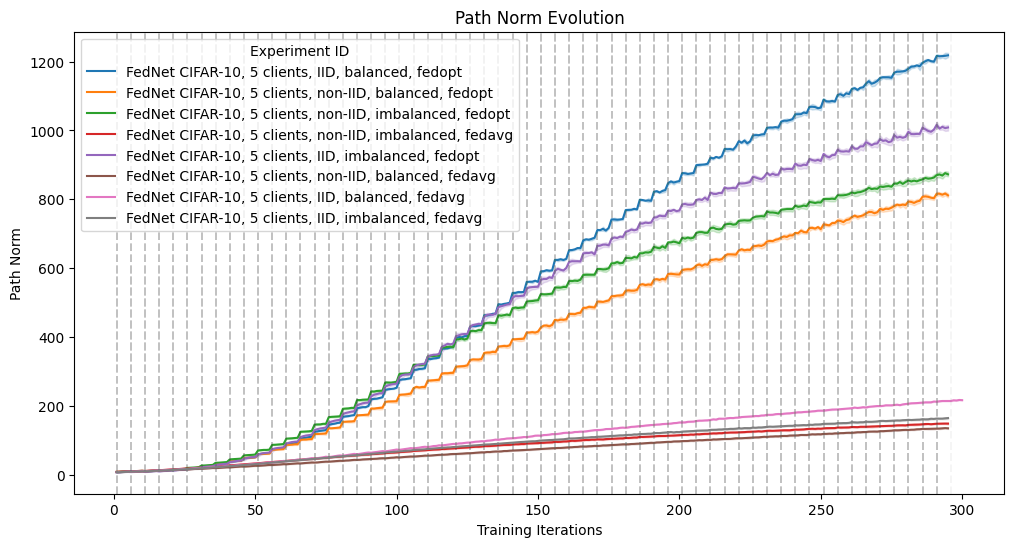

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="iteration", y="path_norm", hue="experiment_id")
# sns.lineplot(data=df, x="iteration", y="global_path_norm", hue="experiment_id")
for epoch_val in df[df['epoch'] == 0]['iteration']:
    plt.axvline(x=epoch_val, color='gray', linestyle='--', alpha=0.01)
plt.title("Path Norm Evolution")
plt.xlabel("Training Iterations")
plt.ylabel("Path Norm")
handles, labels = plt.gca().get_legend_handles_labels()
aliased_labels = [get_experiment_description(label, "../results") for label in labels]
print(aliased_labels)
plt.legend(handles=handles, labels=aliased_labels, title="Experiment ID")
plt.show()

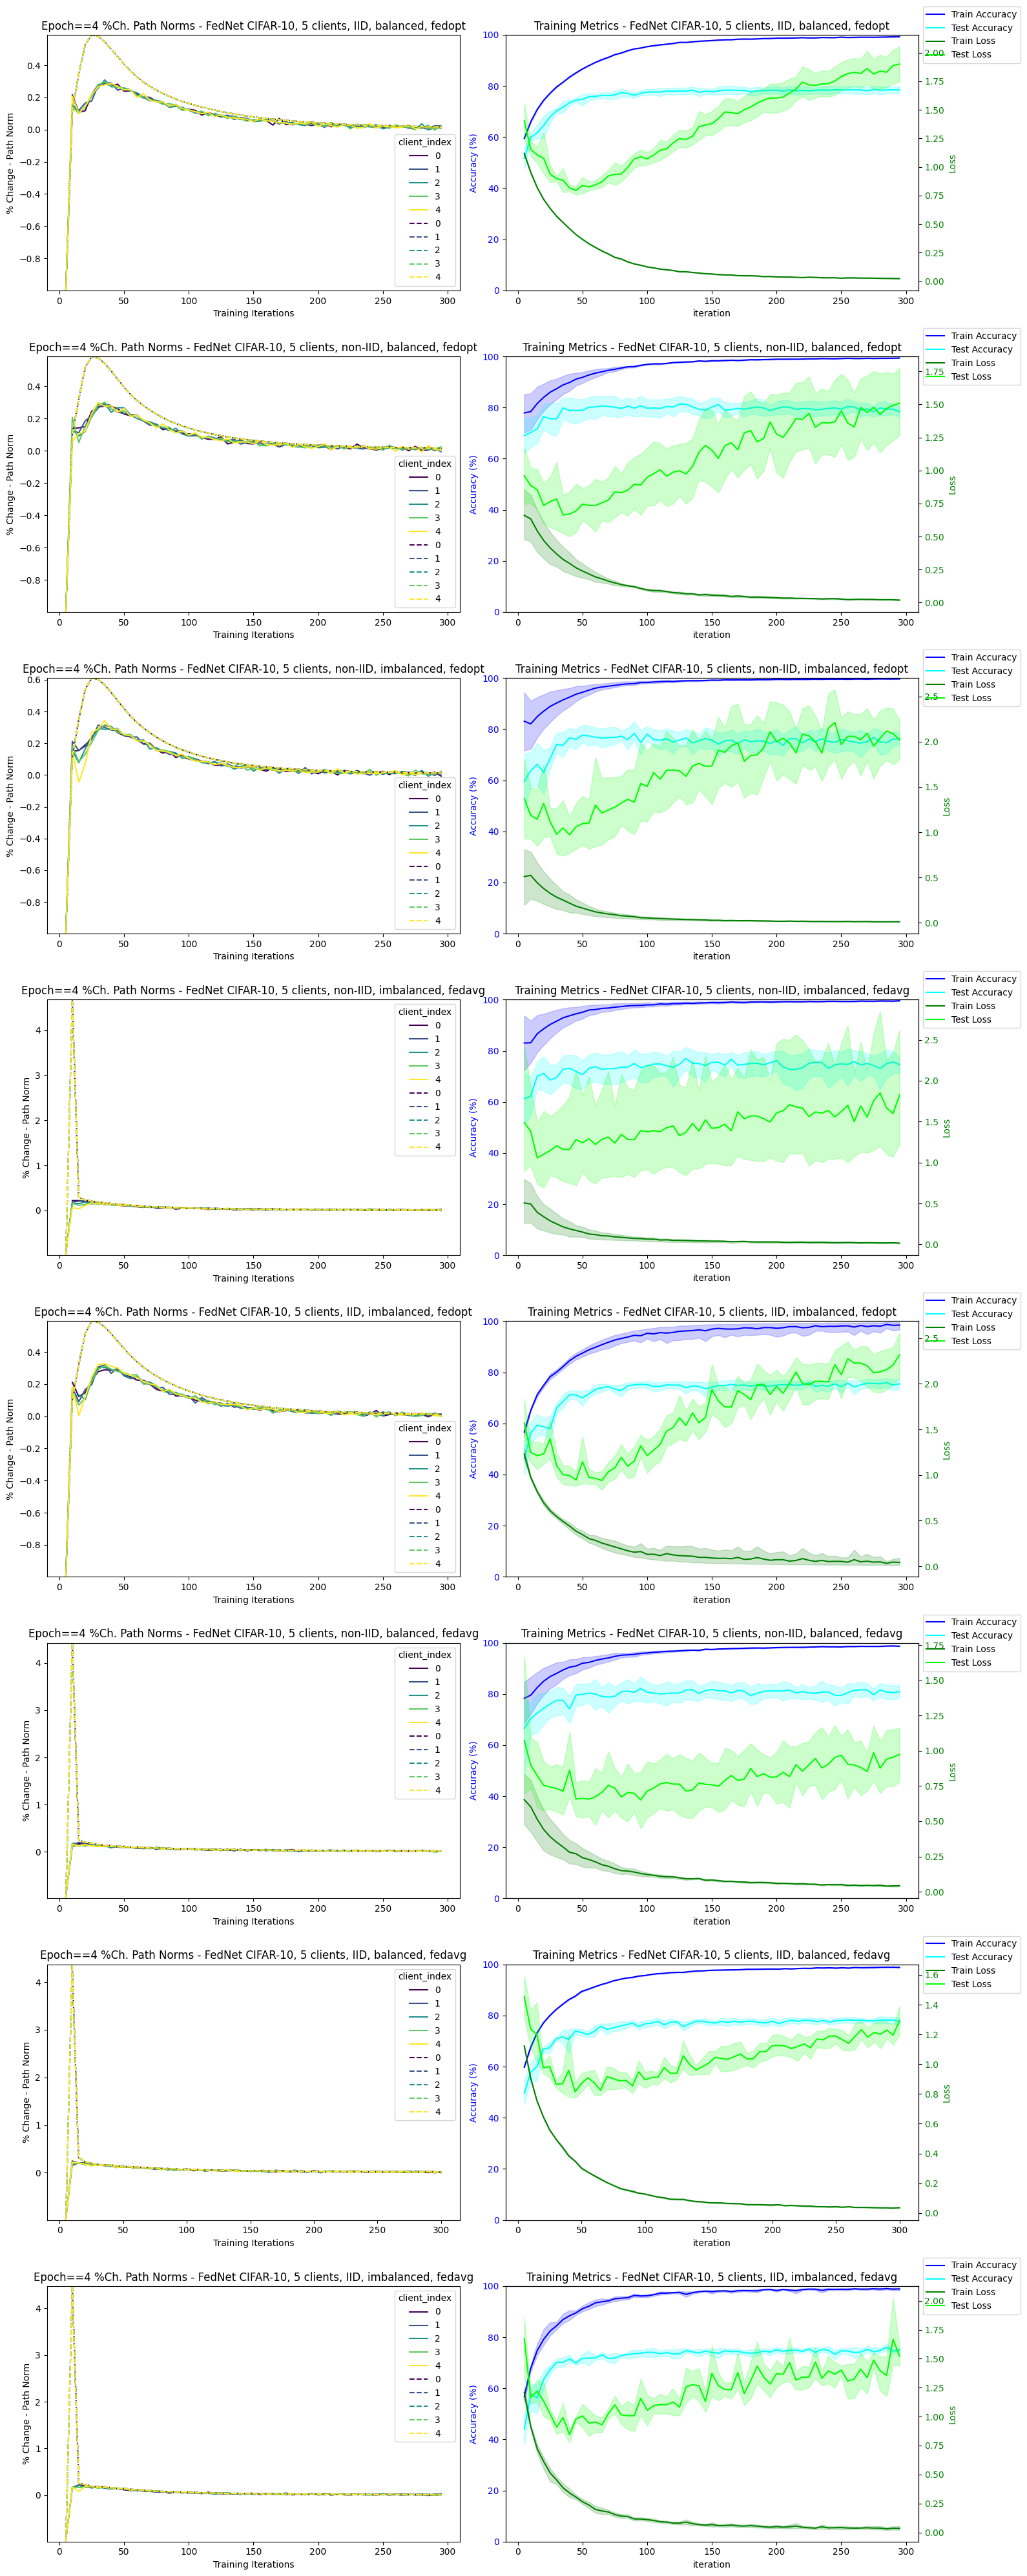

In [6]:
plot_results_overview(df, "../results", pct_change=True, epoch=max(df["epoch"]))